# Fit a RL model on hierarchical data

In [1]:
import pandas as pd

from rlssm.utility.load_data import load_example_dataset
from rlssm.model.models_RL import RLModel_2A


## Import the data

In [2]:
# import some example data:
data = load_example_dataset(hierarchical_levels = 2)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,1,1,1,43,39,2,1,1,1.244082,0
1,1,1,2,60,50,4,3,1,1.101821,1
2,1,1,3,44,36,4,2,2,1.029923,0
3,1,1,4,55,55,4,3,2,1.368007,0
4,1,1,5,52,49,4,3,3,1.039329,1


## Initialize the model

In [3]:
# you can "turn on and off" different mechanisms:
model = RLModel_2A(hierarchical_levels = 2,
                   increasing_sensitivity = False,
                   separate_learning_rates = True)

21:31:21 - cmdstanpy - INFO - compiling stan file /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RL_2A/hierRL_2A_2lr.stan to exe file /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RL_2A/hierRL_2A_2lr
21:31:30 - cmdstanpy - INFO - compiled model executable: /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RL_2A/hierRL_2A_2lr
21:31:30 - cmdstanpy - WARNING - Stan compiler has produced 13 warnings:
21:31:30 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RL_2A/hierRL_2A_2lr.hpp /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RL_2A/hierRL_2A_2lr.stan
Warning in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RL_2A/hierRL_2A_2lr.stan', line 5, column 1: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-forma

## Fit

In [4]:
# sampling parameters
n_warmup = 1000
n_sampling = 3000
n_chains = 2

# learning parameters
K = 4 # n options in a learning block (participants see 2 at a time)
initial_value_learning = 27.5 # initial learning value (Q0)

In [5]:
model_fit = model.fit(
    data, 
    K, 
    initial_value_learning,
    iter_warmup=n_warmup,
    iter_sampling=n_sampling,
    chains = n_chains)

21:31:30 - cmdstanpy - INFO - CmdStan start processing


Fitting the model using the priors:
sensitivity_priors {'mu_mu': 1, 'sd_mu': 30, 'mu_sd': 0, 'sd_sd': 30}
alpha_pos_priors {'mu_mu': 0, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 0.1}
alpha_neg_priors {'mu_mu': 0, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 0.1}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

21:37:09 - cmdstanpy - INFO - CmdStan done processing.
21:37:09 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: bernoulli_lpmf: Probability parameter[1] is -nan, but must be in the interval [0, 1] (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RL_2A/hierRL_2A_2lr.stan', line 99, column 1 to column 36)
	Exception: bernoulli_lpmf: Probability parameter[1] is -nan, but must be in the interval [0, 1] (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RL_2A/hierRL_2A_2lr.stan', line 99, column 1 to column 36)
Exception: bernoulli_lpmf: Probability parameter[1] is -nan, but must be in the interval [0, 1] (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RL_2A/hierRL_2A_2lr.stan', line 99, column 1 to column 36)
Consider re-running with show_console=True if the above output is unclear!



Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0 of 6000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
0.0 of 6000 iterations ended with a divergence (0.0%)


### get Rhat

In [6]:
model_fit.rhat.describe()

,rhat
count,12871.000000
mean,0.999960
std,0.000266
min,0.999668
25%,0.999787
50%,0.999880
75%,1.000050
max,1.002340


### get wAIC

In [7]:
model_fit.waic

{'lppd': -2585.9084928926663,
 'p_waic': 48.890508833985834,
 'waic': 5269.598003453304,
 'waic_se': 90.3266234779511}

## Posteriors

In [8]:
model_fit.samples.describe()

,transf_mu_alpha_pos,transf_mu_alpha_neg,transf_mu_sensitivity,alpha_pos_sbj[1],alpha_pos_sbj[2],alpha_pos_sbj[3],alpha_pos_sbj[4],alpha_pos_sbj[5],alpha_pos_sbj[6],alpha_pos_sbj[7],...,sensitivity_sbj[18],sensitivity_sbj[19],sensitivity_sbj[20],sensitivity_sbj[21],sensitivity_sbj[22],sensitivity_sbj[23],sensitivity_sbj[24],sensitivity_sbj[25],sensitivity_sbj[26],sensitivity_sbj[27]
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.059506,0.241689,0.336431,0.042076,0.012845,0.069562,0.100779,0.102089,0.065057,0.069642,...,0.084164,0.314455,0.373851,0.762191,0.586459,0.903529,0.427344,0.608827,0.083266,0.248265
std,0.010956,0.036338,0.047998,0.020982,0.005566,0.039613,0.044129,0.043182,0.033944,0.026882,...,0.052010,0.073207,0.059295,0.172008,0.112568,0.196123,0.077002,0.149997,0.020144,0.048242
min,0.028466,0.135993,0.191652,0.005658,0.003005,0.001502,0.023548,0.015730,0.010134,0.005722,...,0.016416,0.149404,0.197694,0.364335,0.295360,0.411097,0.204735,0.222980,0.029885,0.136738
25%,0.051886,0.215535,0.303551,0.028759,0.009217,0.046933,0.069461,0.071275,0.042115,0.050870,...,0.059166,0.261382,0.333636,0.648909,0.506823,0.762921,0.374146,0.500956,0.070097,0.215945
50%,0.058375,0.240206,0.332560,0.037053,0.011400,0.066925,0.092922,0.095335,0.057639,0.065407,...,0.072155,0.305257,0.367841,0.736743,0.573209,0.879670,0.418502,0.594130,0.081528,0.242499
75%,0.065994,0.264630,0.365103,0.050203,0.014923,0.090124,0.122071,0.124234,0.078529,0.085054,...,0.088393,0.358810,0.406839,0.845544,0.650095,1.018018,0.470606,0.700382,0.094438,0.273824
max,0.135120,0.422787,0.643286,0.229336,0.057650,0.359134,0.367329,0.379348,0.493682,0.222114,...,0.713744,0.677903,0.730044,1.965720,1.271160,2.223080,1.021170,1.361370,0.293371,0.620097


In [9]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

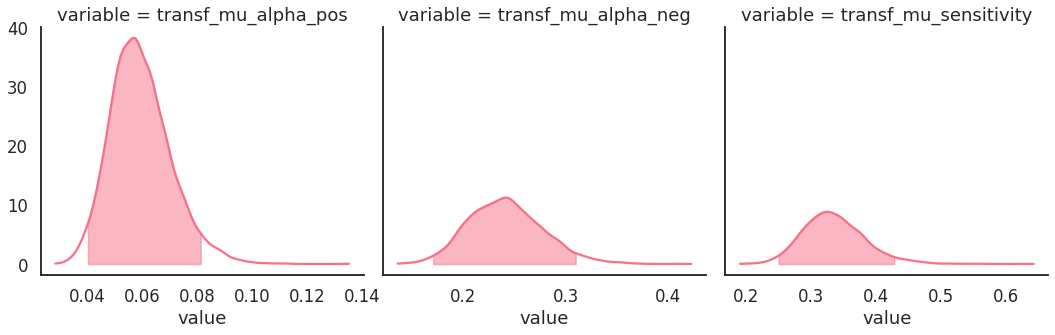

In [10]:
model_fit.plot_posteriors(height=5, show_intervals="HDI", alpha_intervals=.05);

## Posterior predictives

### Ungrouped

In [11]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=500)
pp

variable accuracy                                               ...            \
trial        1    2    3    4    5    6    7    8    9    10    ... 6455 6456   
sample                                                          ...             
1               1    1    0    1    1    1    0    1    1    1  ...    1    0   
2               1    1    1    1    0    1    1    1    1    1  ...    1    1   
3               1    1    1    1    1    1    1    1    1    1  ...    1    1   
4               0    0    1    1    1    0    1    0    1    1  ...    0    1   
5               1    0    1    1    1    1    0    1    1    0  ...    0    1   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
496             1    1    0    0    1    1    1    0    1    0  ...    1    1   
497             1    0    1    0    1    1    1    0    0    0  ...    1    1   
498             0    0    1    1    1    0    1    0    1    1  ...    1    1   
499             1    1    1    1    1    0    0    1    1    1  ...    0    1   
500             1    0    0    0    0    0    1    1    1    0  ...    1    0   

variable                                          
trial    6457 6458 6459 6460 6461 6462 6463 6464  
sample                                            
1           1    1    1    1    1    0    1    1  
2           1    1    1    1    1    1    1    1  
3           0    0    1    1    1    0    1    1  
4           1    1    1    0    1    0    1    1  
5           1    1    1    0    1    1    1    1  
...       ...  ...  ...  ...  ...  ...  ...  ...  
496         1    1    1    1    1    0    1    1  
497         1    1    0    0    1    1    1    1  
498         1    1    1    1    1    1    1    0  
499         1    1    1    1    1    1    1    1  
500         1    0    1    0    0    1    1    1  

[500 rows x 6464 columns]

In [12]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=500)
pp_summary

,mean_accuracy
sample,
1,0.806776
2,0.802135
3,0.794090
4,0.798577
5,0.804610
...,...
496,0.791925
497,0.801516
498,0.793936


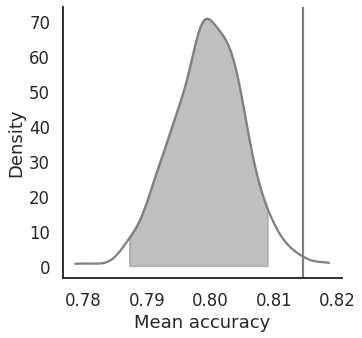

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

model_fit.plot_mean_posterior_predictives(n_posterior_predictives=500, ax=ax, show_intervals='HDI')

ax.set_ylabel('Density')
ax.set_xlabel('Mean accuracy')

sns.despine()

### Grouped

In [14]:
import numpy as np

In [15]:
# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [16]:
model_fit.get_grouped_posterior_predictives_summary(grouping_vars=['block_label', 'block_bins', 'choice_pair'], n_posterior_predictives=500)

mean_accuracy
block_label block_bins choice_pair sample               
1           1          AB          1            0.603175
                                   2            0.476190
                                   3            0.476190
                                   4            0.507937
                                   5            0.523810
...                                                  ...
3           8          CD          496          0.777778
                                   497          0.759259
                                   498          0.740741
                                   499          0.759259
                                   500          0.648148

[48000 rows x 1 columns]

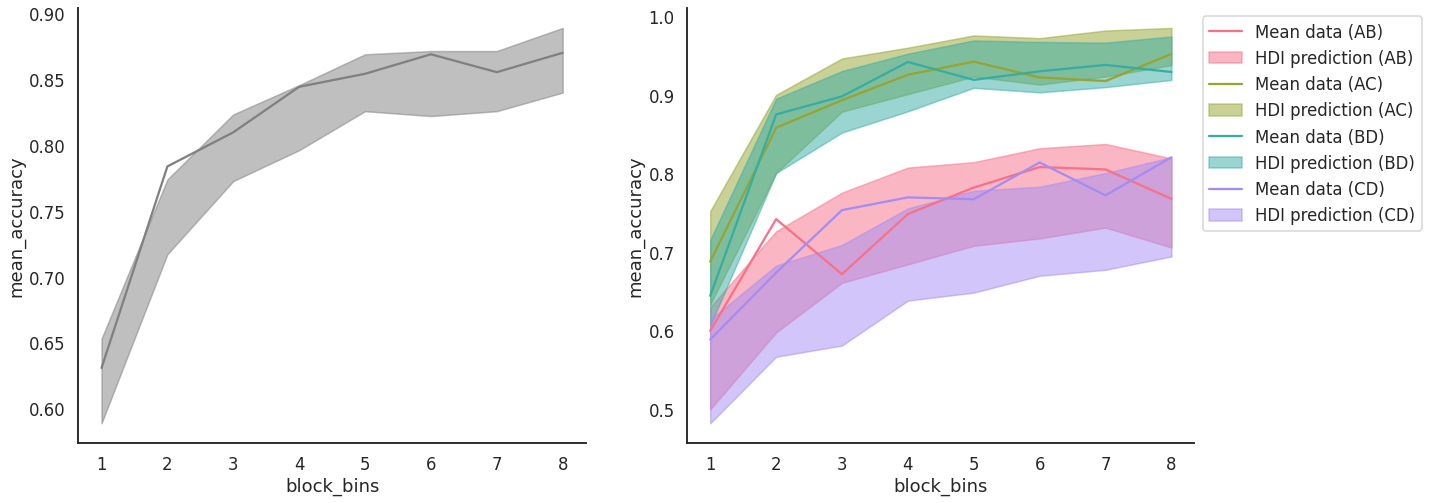

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20,8))

model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], n_posterior_predictives=500, ax=axes[0])

model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins', 'choice_pair'], n_posterior_predictives=500, ax=axes[1])

sns.despine()